# <center> Algorithmic Trading Strategy (ETH-USD)
---

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("classic")

In [41]:
data = pd.read_csv("ETH-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-24,0.859433,0.882818,0.847600,0.863262,0.863262,3.546460e+05
1,2015-12-25,0.861993,0.882556,0.861993,0.870363,0.870363,1.871140e+05
2,2015-12-26,0.870766,0.897453,0.838314,0.854603,0.854603,4.252820e+05
3,2015-12-27,0.853166,0.861538,0.841151,0.856365,0.856365,1.645650e+05
4,2015-12-28,0.856356,0.872394,0.832932,0.845005,0.845005,2.351340e+05
...,...,...,...,...,...,...,...
1822,2020-12-19,654.624207,668.769592,646.616211,659.297913,659.297913,1.283089e+10
1823,2020-12-20,659.185059,659.923706,625.014465,638.290833,638.290833,1.337586e+10
1824,2020-12-21,638.315186,646.846558,600.836060,609.817871,609.817871,1.441949e+10
1825,2020-12-22,609.420532,635.076599,589.552002,634.854187,634.854187,1.474589e+10


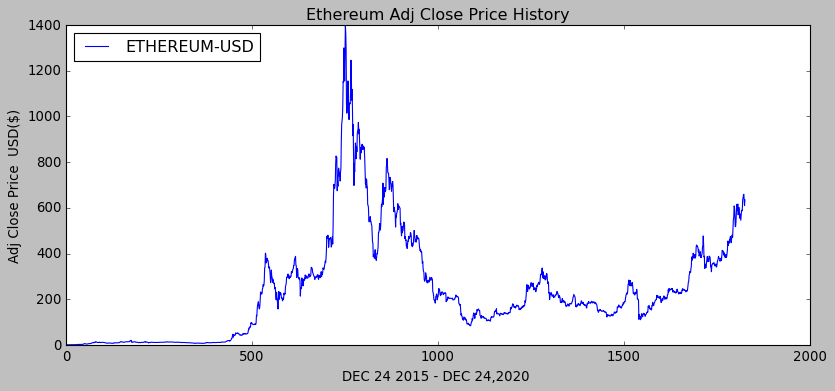

In [42]:
plt.figure(figsize=(12, 5))
plt.plot(data['Adj Close'], label='ETHEREUM-USD')
plt.title('Ethereum Adj Close Price History')
plt.xlabel("DEC 24 2015 - DEC 24,2020 ")
plt.ylabel("Adj Close Price  USD($)")
plt.legend(loc="upper left")
plt.show()

## Creating a Simple moving average with a 30 day window

In [43]:
sma30 = pd.DataFrame()
sma30['Adj Close'] = data['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1822,582.936367
1823,587.221242
1824,589.232284
1825,591.791819


## Creating a Simple moving average with a 100 day window

In [44]:
sma100 = pd.DataFrame()
sma100['Adj Close'] = data['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1822,448.344678
1823,450.980630
1824,453.206978
1825,455.899820


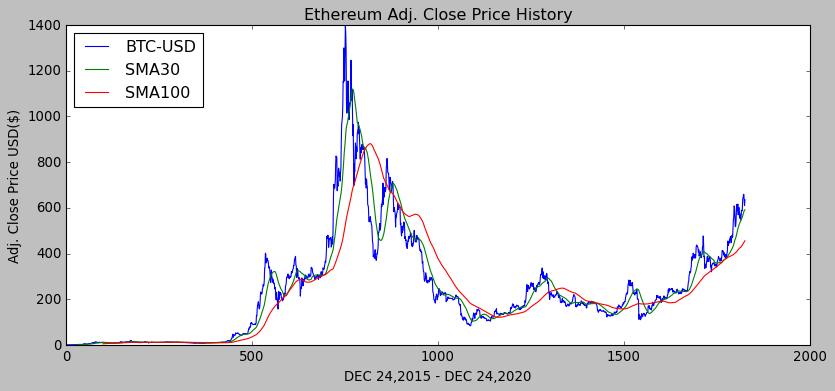

In [45]:
plt.figure(figsize=(12,5))
plt.plot(data['Adj Close'], label='BTC-USD')
plt.plot(sma30['Adj Close'], label='SMA30')
plt.plot(sma100['Adj Close'], label='SMA100')
plt.title("Ethereum Adj. Close Price History")
plt.xlabel('DEC 24,2015 - DEC 24,2020')
plt.ylabel('Adj. Close Price USD($)')
plt.legend(loc='upper left')
plt.show()

In [46]:
data2 = pd.DataFrame()
data2['BTC'] =data['Adj Close']
data2['SMA30'] = sma30['Adj Close']
data2['SMA100'] = sma100['Adj Close']
data2

,BTC,SMA30,SMA100
0,0.863262,NaN,NaN
1,0.870363,NaN,NaN
2,0.854603,NaN,NaN
3,0.856365,NaN,NaN
4,0.845005,NaN,NaN
...,...,...,...
1822,659.297913,582.936367,448.344678
1823,638.290833,587.221242,450.980630
1824,609.817871,589.232284,453.206978
1825,634.854187,591.791819,455.899820


## Function to signal when to buy or sell stock

In [47]:
def buySell(data2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data2)):
    if data2['SMA30'][i] > data2['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data2['BTC'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data2['SMA30'][i] < data2['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data2['BTC'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

## Visualize the data and strategy to buy and sell stock

In [48]:
buySell = buySell(data2)
data2['Buy Signal Price'] = buySell[0]
data2['Sell Signal Price'] = buySell[1]
data2

,BTC,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,0.863262,NaN,NaN,NaN,NaN
1,0.870363,NaN,NaN,NaN,NaN
2,0.854603,NaN,NaN,NaN,NaN
3,0.856365,NaN,NaN,NaN,NaN
4,0.845005,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1822,659.297913,582.936367,448.344678,NaN,NaN
1823,638.290833,587.221242,450.980630,NaN,NaN
1824,609.817871,589.232284,453.206978,NaN,NaN
1825,634.854187,591.791819,455.899820,NaN,NaN


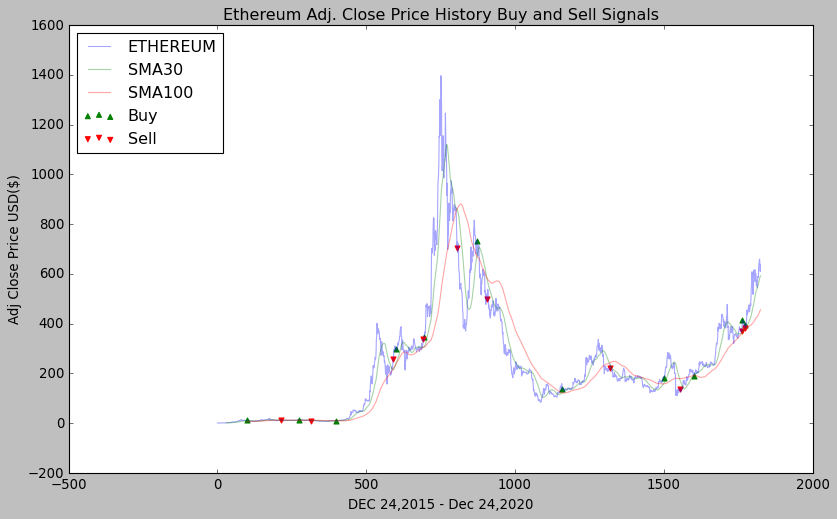

In [49]:
plt.style.use('classic')
plt.figure(figsize=(12,7))
plt.plot(data2['BTC'], label='ETHEREUM', alpha=0.35)
plt.plot(data2['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data2['SMA100'],label='SMA100', alpha=0.35)
plt.scatter(data2.index, data2['Buy Signal Price'], label ='Buy', marker='^',color='green')
plt.scatter(data2.index, data2['Sell Signal Price'],label='Sell', marker='v', color='red')
plt.title('Ethereum Adj. Close Price History Buy and Sell Signals')
plt.xlabel("DEC 24,2015 - Dec 24,2020")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='upper left')
plt.show()

---